# Predicting Allstate Insurance Costs
A machine learning regression project using linear modeling to estimate car insurance premiums in the U.S.

**Author**: Stefan Jafry  
**Dataset**: Allstate cleaned survey  
**Goal**: Identify cost-driving factors and build an interpretable model  
**Tech Stack**: pandas, seaborn, statsmodels, matplotlib  

##  1. Introduction

**Business Context.** The ability to price an insurance quote properly has a significant impact on insurers' management decisions and financial statements. In this project we play the role of chief data scientist at a new startup insurance company focusing on providing affordable insurance to millennials. We are tasked to assess the current state of insurance companies to see what factors large insurance providers charge premiums for. Fortunately for us, our company has compiled a dataset by surveying what people currently pay for insurance from large companies. Our findings will be used as the basis of developing our company's millenial car insurance offering. 

**Business Problem.**  Task is to build a **minimal** model to predict the cost of insurance from the data set using various characteristics of a policyholder.

**Analytical Context.** The data resides in a CSV file which has been pre-cleaned for use and can directly be read in. Throughout the case, we will be iterating on an initial model many times based on common pitfalls that arise when creating machine learning models. We will be using the Python `statsmodels` package to create and analyze these linear models.

In [1]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

# This statement allow to display plot without asking to 
%matplotlib inline

# always make it pretty 
plt.style.use('ggplot')

## 2. Data Loading and Descriptions

In [2]:
df = pd.read_csv('Allstate-cost-cleaned.csv',
    dtype = { # indicate categorical variables
        'A': 'category',
        'B': 'category',
        'C': 'category',
        'D': 'category',
        'E': 'category',
        'F': 'category',
        'G': 'category',
        'car_value': 'category',
        'state': 'category'
    }
)

The following are the columns in the dataset:

1. **state**: State where shopping point occurred
2. **group_size**: How many people will be covered under the policy (1, 2, 3 or 4) 
3. **homeowner**: Whether the customer owns a home (0=no, 1=yes)
4. **car_age**: Age of the customer's car (How old the car is)
5. **car_value**: Value of the car when it was new
6. **risk_factor**: An ordinal assessment of how risky the customer is (0,1, 2, 3, 4) 
7. **age_oldest**: Age of the oldest person in customer's group
8. **age_youngest**: Age of the youngest person in customer's group
9. **married_couple**: Does the customer group contain a married couple (0=no, 1=yes) 
10. **C_previous**: What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
11. **duration_previous**: How long (in years) the customer was covered by their previous issuer
12. **A,B,C,D,E,F,G**: The coverage options:
13. **A**: Collision (levels: 0, 1, 2);
14. **B**: Towing (levels: 0, 1);
15. **C**: Bodily Injury (BI, levels: 1, 2, 3, 4);
16. **D**: Property Damage (PD, levels 1, 2, 3);
17. **E**: Rental Reimbursement (RR, levels: 0, 1);
18. **F**: Comprehensive (Comp, levels: 0, 1, 2, 3);
19. **G**: Medical/Personal Injury Protection (Med/PIP, levels: 1, 2, 3, 4)
20. **cost**: cost of the quoted coverage options 

In [3]:
df.head(10)

,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,...,C,D,E,F,G,cost,car_age_bins,age_oldest_bins,age_youngest_bins,duration_previous_bins
0,0,OK,1,0,9,f,0.0,24,24,0,...,1,1,0,0,4,543,"(5, 10]","(15, 25]","(15, 25]","(6, 9]"
1,1,OK,1,0,9,f,0.0,24,24,0,...,1,3,1,3,2,611,"(5, 10]","(15, 25]","(15, 25]","(6, 9]"
2,2,PA,1,1,7,f,0.0,74,74,0,...,2,3,1,2,2,691,"(5, 10]","(65, 75]","(65, 75]","(12, 15]"
3,3,PA,1,1,7,f,0.0,74,74,0,...,2,3,1,2,2,695,"(5, 10]","(65, 75]","(65, 75]","(12, 15]"
4,4,AR,1,0,4,d,4.0,26,26,0,...,1,1,0,2,2,628,"(0, 5]","(25, 35]","(25, 35]","(0, 3]"
5,5,AR,1,0,4,d,4.0,26,26,0,...,2,1,0,2,2,625,"(0, 5]","(25, 35]","(25, 35]","(0, 3]"
6,6,AR,1,0,4,d,4.0,26,26,0,...,2,1,0,2,2,628,"(0, 5]","(25, 35]","(25, 35]","(0, 3]"
7,7,OK,1,0,13,f,3.0,22,22,0,...,1,1,0,0,2,596,"(10, 15]","(15, 25]","(15, 25]",NaN
8,8,OK,1,0,13,f,3.0,22,22,0,...,1,1,0,3,2,711,"(10, 15]","(15, 25]","(15, 25]",NaN
9,9,OK,1,0,13,f,3.0,22,22,0,...,1,1,0,3,2,722,"(10, 15]","(15, 25]","(15, 25]",NaN


## 3. Exploratory Data Analysis (EDA)

Write code to visualize the relationship between cost and the following variables. Choose plots judiciously based on what is known about each variable. Different variable types (categorical vs. numerical) should have different types of plots (e.g. scatter, boxplot, violin plot, etc.) Group the plots together using the `plt.subplot()` function.

1. `car_age`
2. `age_oldest`
3. `age_youngest`
4. `duration_previous`
5. `C_previous`
6. `homeowner`
7. `group_size`
8. `car_age`
9. Categories A-G (7 different plots)

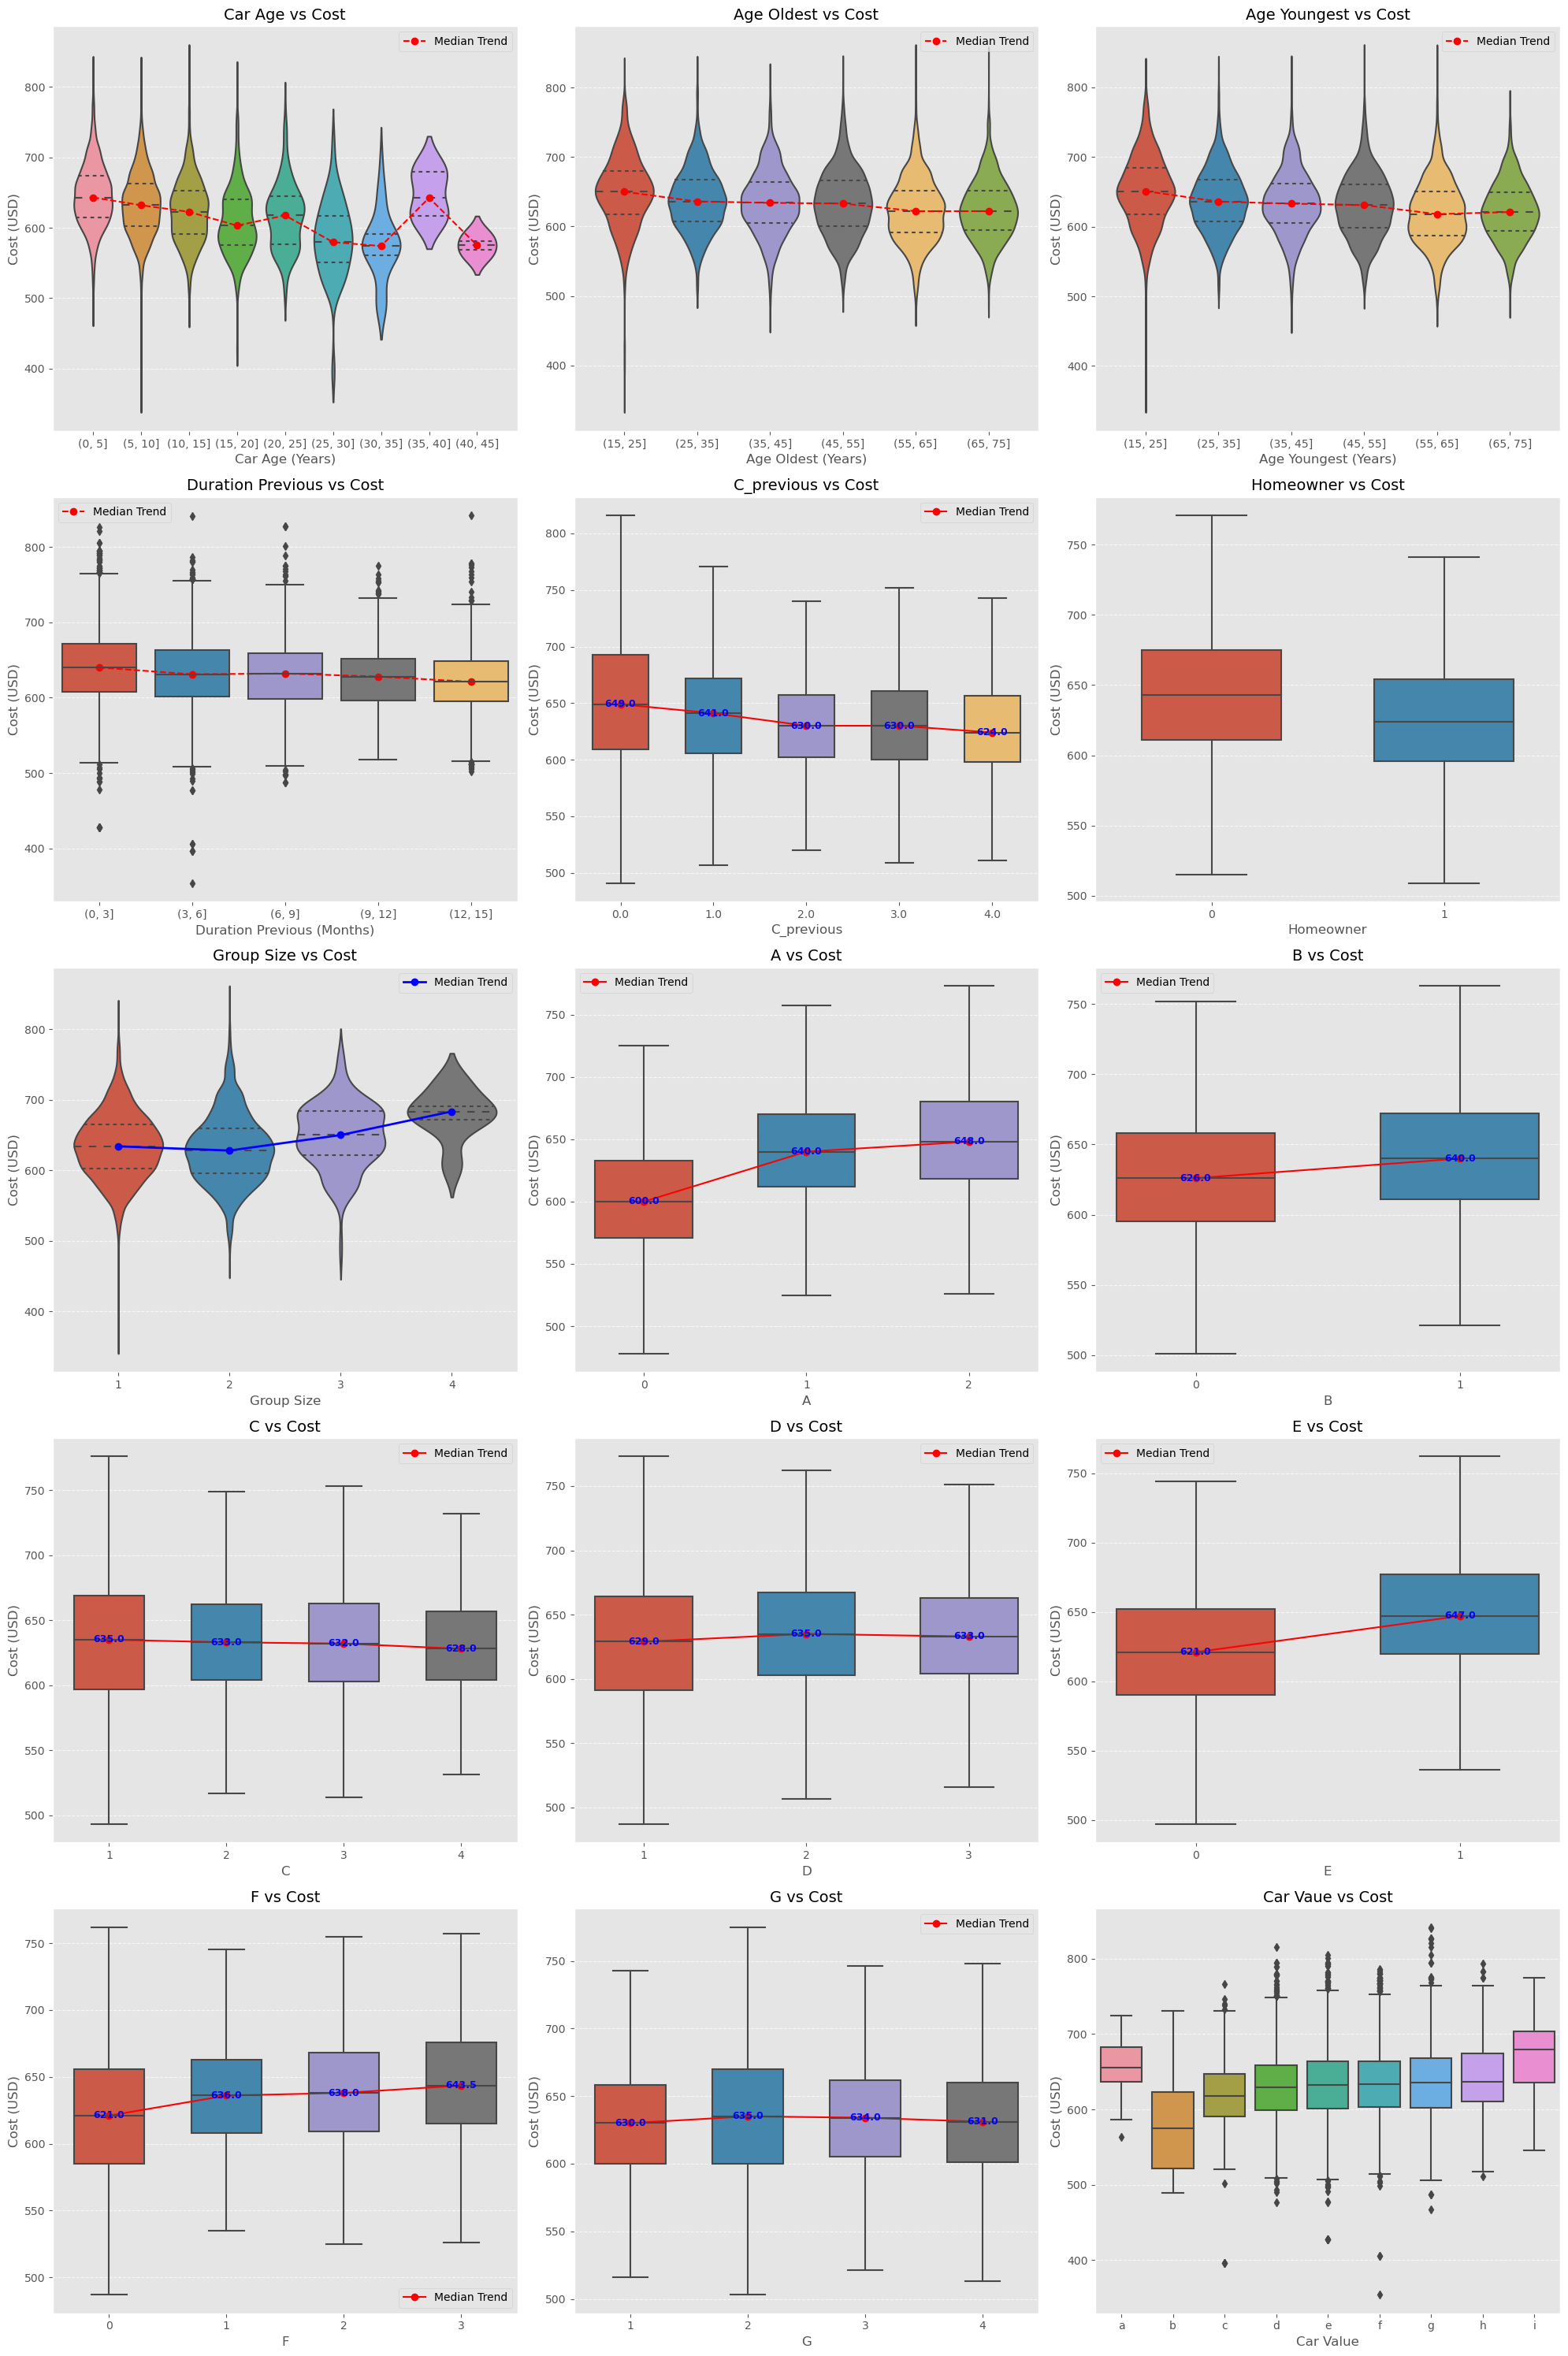

In [4]:
plt.figure(figsize=(20, 30))
plt.subplot(5, 3, 1)
df['car_age_bins'] = pd.cut(df['car_age'], bins=np.arange(0, 50, 5))
medians = df.groupby('car_age_bins')['cost'].median()
sns.violinplot(x='car_age_bins', y='cost', data=df, scale='width', inner='quartile')
plt.plot(np.arange(len(medians)), medians, color='red', linestyle='--', marker='o', label='Median Trend')
plt.title('Car Age vs Cost', fontsize=14)
plt.xlabel('Car Age (Years)', fontsize=12)
plt.ylabel('Cost (USD)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(5, 3, 2)
df['age_oldest_bins'] = pd.cut(df['age_oldest'], bins=np.arange(15,80, 10))
medians = df.groupby('age_oldest_bins')['cost'].median()
sns.violinplot(x='age_oldest_bins', y='cost', data=df, scale='width', inner='quartile')
plt.plot(np.arange(len(medians)), medians, color='red', linestyle='--', marker='o', label='Median Trend')
plt.title('Age Oldest vs Cost', fontsize=14)
plt.xlabel('Age Oldest (Years)', fontsize=12)
plt.ylabel('Cost (USD)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(5, 3, 3)
df['age_youngest_bins'] = pd.cut(df['age_youngest'], bins=np.arange(15,80, 10))
medians = df.groupby('age_youngest_bins')['cost'].median()
sns.violinplot(x='age_youngest_bins', y='cost', data=df, scale='width', inner='quartile')
plt.plot(np.arange(len(medians)), medians, color='red', linestyle='--', marker='o', label='Median Trend')
plt.title('Age Youngest vs Cost', fontsize=14)
plt.xlabel('Age Youngest (Years)', fontsize=12)
plt.ylabel('Cost (USD)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(5, 3, 4)
df['duration_previous_bins'] = pd.cut(df['duration_previous'], bins=np.arange(0,18,3))
medians = df.groupby('duration_previous_bins')['cost'].median()
sns.boxplot(x='duration_previous_bins', y='cost', data=df)
plt.plot(np.arange(len(medians)), medians, color='red', linestyle='--', marker='o', label='Median Trend')
plt.title('Duration Previous vs Cost', fontsize=14)
plt.xlabel('Duration Previous (Months)', fontsize=12)
plt.ylabel('Cost (USD)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(5, 3, 5)
sns.boxplot(x='C_previous', y='cost', data=df, showfliers=False, width=0.6)
median_cost = df.groupby('C_previous')['cost'].median()
for i, median in enumerate(median_cost):
    plt.text(i, median, f'{median:.1f}', ha='center', va='center', fontsize=9, color='blue', fontweight='bold')
plt.plot(median_cost.index, median_cost.values, color='red', marker='o', label='Median Trend')
plt.title('C_previous vs Cost', fontsize=14)
plt.xlabel('C_previous', fontsize=12)
plt.ylabel('Cost (USD)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(5, 3, 6)
sns.boxplot(x='homeowner', y='cost', data=df, showfliers=False, width=0.6)
plt.title('Homeowner vs Cost', fontsize=14)
plt.xlabel('Homeowner', fontsize=12)
plt.ylabel('Cost (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(5, 3, 7)
sns.violinplot(x='group_size', y='cost', data=df, scale='width', inner='quartile')
group_medians = df.groupby('group_size')['cost'].median()
plt.plot(group_medians.index - 1, group_medians, color='blue', marker='o', linestyle='-', linewidth=2, label='Median Trend')
plt.title('Group Size vs Cost', fontsize=14)
plt.xlabel('Group Size', fontsize=12)
plt.ylabel('Cost (USD)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
for i, col in enumerate(columns):
    plt.subplot(5, 3, 8 + i)
    sns.boxplot(x=col, y='cost', data=df, showfliers=False, width=0.6)
    median_cost = df.groupby(col)['cost'].median()
    for j, median in enumerate(median_cost):
        plt.text(j, median, f'{median:.1f}', ha='center', va='center', fontsize=9, color='blue', fontweight='bold')
    plt.plot(median_cost.index, median_cost.values, color='red', marker='o', label='Median Trend')
    plt.title(f'{col} vs Cost', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Cost (USD)', fontsize=12)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(5, 3, 15)
sns.boxplot(x='car_value', y='cost', data=df)
plt.title('Car Vaue vs Cost', fontsize=14)
plt.xlabel('Car Value', fontsize=12)
plt.ylabel('Cost (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [5]:
#Remove Binned data for linear regression.
df = df.drop(columns=['car_age_bins', 'age_oldest_bins','age_youngest_bins','duration_previous_bins'])

# Insight 
(Important to note: used median trends; however, mean trends produced the same output with the same trend line.)

Plots 1-3) A violin plot with a median trend line was used to show the number of people in each cost group while showing medians, IQRs, and outliers. The tread lines helped demonstrate positive or negative correlations. Binned the data for clarity and readability. Other graphs, for example, heatmaps, gave no valuable insight or not to the same extent as the violin plot. Could also have used a box plot for about the same level of understanding.

Plot 1 insight) Showed how an increase in car age results, on average, a decrease in prices from years 0-20. After prices increase from 20-25, this is usually when cars typically break down and require car part replacements. Prices then go down for years 25-35 and see a massive spike at 35-45 years, as almost all cars need replacement by this time. The dip in cost for ages 40-45 is due to the minimal amount of data for cars that last this long. 

Plot 2 insight) Costs will be higher if the oldest person on the insurance is between 18-25 because being a teenager/ young usually increases the likelihood of getting into an accident. After the age of 25, costs tend to even out, as being between the ages of 25 and 75 has around the same risk. On average, people who are 80+ usually will have a spike in insurance costs; however, we do not have data on anyone over the age of 76.

Plot 3 insight) The Data is almost identical to plot 2. This means that insurance companies only care about the high-risk people on their policies. Having older people also on the policies will not reduce costs.

Plot 4 and insight) I decided on a boxplot with a median trend to show how the mean remains relatively consistent over the different x values, which slightly decrease each time. What's more important to note is how the boxplot gets smaller and smaller with each other x value, demonstrating the reduced variability in costs. This could be due to a stable risk profile and established claim patterns that make the customer much more predictable.

Plot 5 and insight) Deciding on a box plot with a trendline, such as a heat map or a bar chart with error bars, did not effectively demonstrate anything helpful. Using a violin plot also seemed unnecessary, as having density didn't provide any extra insight and made it more complex. Not being previously insured will result in an increase in costs. Being previously insured for 1 year will decrease costs, and being previously insured for 2-4 years will further decrease costs. Something interesting to note is the difference between 2-3 years and 3-4 years is minuscule. Insurance companies only care if you were insured for at least 2 years.

Plot 6 and insight) used a box plot to demonstrate how if you're in the IQR, having a home could reduce costs to up to 50 dollars, and if you lie in the maximum cost value, owning a home can decrease costs to up to $75. Violin plots provided density, which I found unnecessary extra data that provided no extra conclusions; other plots did not give as much insight or clarity.

Plot 7 and insight) I decided on a violin plot with a trendline as density gave extra insight, and the trendline showed a positive correlation. When looking at the tread line on average, as the group size increases, so does the cost. The max value of groups of 4 remains similar to the other group sizes. The density of the first 3 violins is distributed mainly along the IQR, with the fourth plot having some density in the lower cost range.

Plots 8-14 and Inisght) Decided on a boxplot because it provided the most valuable and easy-to-read information. For category A, you can see how increased levels result in higher pricing on average, even having the minimum and maximum be higher than the previous level. The same goes for plot B. For plots C, the median pricing does not change as levels increase and remains consistent. Variability decreases as levels increase. Same for plot D. For plot E, increased levels result in higher pricing on average, even having the minimum and maximum be higher than the previous level. Plot E's behavior is highly similar to plot B. For plot F, median pricing increases as the levels increase, with level zero having the highest degree of variability and level one having the slightest degree of variability. For plot G, the opposite is true: level zero with the lowest degree and level one with the highest degree of variability. Median trends stay the same as levels increase.

Plot 15) Catagorical data therefore would may have been more useful to change into numerical for more insight. However based on the data provided, Car value a and i are the most valuable on average, with car value b being the lowest.

### One-Hot Encoding and Feature Engineering

Convert all categorical data to be in the one-hot encoding format.

In [6]:
catagorical_columns=['state','car_value','A','B','C','D','E','F','G']
data_one_hot_encoded=pd.get_dummies(df,columns=catagorical_columns,drop_first=False)
output_path='Allstate-cost-one-hot-encoded.csv'
data_one_hot_encoded.to_csv(output_path, index=False)
print(data_one_hot_encoded.head())

   Unnamed: 0  group_size  homeowner  car_age  risk_factor  age_oldest  \
0           0           1          0        9          0.0          24   
1           1           1          0        9          0.0          24   
2           2           1          1        7          0.0          74   
3           3           1          1        7          0.0          74   
4           4           1          0        4          4.0          26   

   age_youngest  married_couple  C_previous  duration_previous  ...  E_0  E_1  \
0            24               0         3.0                9.0  ...    1    0   
1            24               0         3.0                9.0  ...    0    1   
2            74               0         2.0               15.0  ...    0    1   
3            74               0         2.0               15.0  ...    0    1   
4            26               0         3.0                1.0  ...    1    0   

   F_0  F_1  F_2  F_3  G_1  G_2  G_3  G_4  
0    1    0    0    0   

----------

## Fitting a multiple linear regression

Split the data into training and testing sets (an 80-20 split is a good starting point).

**Note:** Keep random seed as 1337 in the code cell

In [7]:
np.random.seed(1337)
shuffled_indices = np.random.permutation(len(data_one_hot_encoded))
split_index = int(0.8 * len(data_one_hot_encoded))
train_indices = shuffled_indices[:split_index]
test_indices = shuffled_indices[split_index:]
train_data = data_one_hot_encoded.iloc[train_indices]
test_data = data_one_hot_encoded.iloc[test_indices]
X_train = train_data.drop(columns=['cost'])
y_train = train_data['cost']
X_test = test_data.drop(columns=['cost'])
y_test = test_data['cost']
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (12386, 77)
Testing features shape: (3097, 77)
Training target shape: (12386,)
Testing target shape: (3097,)


----------

## 4 Model Training
Fit a multiple linear regression model to the training data regressing cost against all the other variables. Call this `model_all`.

In [8]:
X_train = train_data.drop(columns=['cost'])
y_train = train_data['cost']

X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

X_train = X_train.fillna(0) 
y_train = y_train.fillna(y_train.mean())  

print("After reloading:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train_with_const = sm.add_constant(X_train)

model_all = sm.OLS(y_train, X_train_with_const).fit()

aic_value = model_all.aic
print("AIC Value:", aic_value)
print(model_all.summary())

After reloading:
X_train shape: (12386, 77)
y_train shape: (12386,)
AIC Value: 123658.63061959513
                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     139.9
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        01:00:40   Log-Likelihood:                -61759.
No. Observations:               12386   AIC:                         1.237e+05
Df Residuals:                   12316   BIC:                         1.242e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

----------

## Analysis:

Some States that are the most expensive are:
New York(45 dollar increase), Washington(DC) (42 dollar increase), Delaware(40 dollar increase), West Virginia(36 dollar increase), Connecticut(35 dollar increase)
Some States that are the least expensive are:
Iowa(44 dollar decrease), Maine(29 dollar decrease), Wisconson(26 dollar decrease), Missouri(16 dollar decrease), Idaho (14 dollar decrease)

----------

Interpret the coefficients of `group_size`, `homeowner`, `car_age`, `risk_factor`, `age_oldest`, `age_youngest`       `married_couple` , `duration_previous`. 

Group size has a slight positive influence on costs, which contradicts expectations in this business context. A larger group size means more insured drivers under the same policy, increasing the likelihood of at least one driver filing a claim. Additionally, more people on a policy likely means more insured cars, raising aggregate risk. Even if the per-driver risk remains constant, the total exposure should increase. Looking at our box plot, policies with more insured individuals show a higher median cost, reinforcing this expectation.

Homeownership has a negative influence on cost, which aligns with expectations. Homeowners typically have better credit ratings, stable incomes, and lower overall financial risk, which insurance companies associate with safer behavior. As a result, they generally receive lower insurance costs.

Car age shows almost no correlation with cost, which makes sense given the nature of our dataset. The relationship between car age and cost is not linear: for cars aged 0-20 years, the price tends to decrease, while for 20-25 years, it increases. Because our dataset covers all vehicle ages, these opposing trends likely cancel each other out, resulting in a near-zero correlation.

Risk factors have almost no correlation with cost, contradicting business expectations. Higher risk scores should typically lead to increased insurance costs, as risk is one of the first factors insurers assess. Other variables should have minimal impact on this relationship, yet our data does not reflect this. This anomaly suggests potential issues with feature scaling, multicollinearity, or missing data affecting how risk factors influence cost.

Age oldest has nearly zero correlation with cost, which does not align with expectations. Generally, older drivers tend to have lower insurance costs due to their lower risk profile. Since high-risk elderly drivers (80+) are absent in our dataset, that explanation does not apply here. One possible reason for this unexpected result is that policies often cover multiple people, including younger drivers, which could indirectly skew the data.

Age youngest has a very small negative correlation with cost, which contradicts standard risk assessment. Younger drivers are typically high-risk, meaning their presence on a policy should increase expenses. One potential explanation is that many young drivers are covered under multi-driver policies with older, lower-risk individuals. 

Married couples show a negative correlation with cost, which aligns with expectations. Married individuals tend to be older, more financially stable, and lower risk, leading to lower average costs compared to single drivers.

Duration previous has a slight negative correlation with cost, which fits business logic but appears weaker than expected. Customers who remain with an insurance company longer tend to have stable risk profiles and predictable claim patterns, which should result in lower costs. The minimal correlation suggests that other variables, such as policy type or regional differences, may influence this effect.

----------

Determine which variables from model_all are statistically significant? (For categorical variables, consider them to be significant if at least one of their categories are statistically significant). Refit the model using only these variables; call this `model_sig`. How does this model compare to the previous model?

The variabled from model_all that are statistically significant are: home_owner, car_age, age_oldest, age_yougest, married_couple, C_previous, Duration_previous, States, car_value, and (A,B,C,D,E,F,G)

In [9]:
significant_vars = [
    "group_size", "homeowner", "car_age", "age_oldest", "age_youngest",
    "married_couple", "C_previous", "duration_previous", 'A_0','A_1','A_2','B_0','B_1','C_1','C_2','C_3',
    'C_4','D_1','D_2','D_3','E_0','E_1','F_0','F_1','F_2','F_3','G_1','G_2','G_3','G_4','state_AL','state_AR',
    "state_CO", "state_CT", "state_DC", "state_DE", "state_FL", "state_GA", "state_IA", "state_ID",
    "state_IN", "state_KY", "state_MD", "state_ME", "state_MO", "state_MT", "state_ND", "state_NE",
    "state_NH", "state_NV", "state_NY", "state_OH", "state_OK", "state_PA", "state_RI", "state_TN",
    "state_UT", "state_WA", "state_WI", "state_WV",'state_WY','car_value_a', "car_value_b", "car_value_c", "car_value_d",
    "car_value_e", "car_value_f", "car_value_g", "car_value_h", "car_value_i"
]

X_train_sig = X_train[significant_vars]

X_train_sig_with_const = sm.add_constant(X_train_sig)

model_sig = sm.OLS(y_train, X_train_sig_with_const).fit()
print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     152.9
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        01:00:40   Log-Likelihood:                -61767.
No. Observations:               12386   AIC:                         1.237e+05
Df Residuals:                   12322   BIC:                         1.241e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               205.6888      1.77

Comparing our model to the previous model, there was no change in the R-squared or Adjusted R-squared. The AIC and BIC slightly improved in the second model, indicating marginally better model efficiency. There is a higher F-statistic in the second model, which means our second model is somewhat stronger.

----------


In addition to the variables in `model_sig`, add terms for:

1. square of `age_youngest`
2. square term for the age of the car
3. interaction term for `car_value` and `age_youngest`

and save it to a new model `model_sig_plus`.

In [10]:
X_train_sig_updated = X_train[significant_vars].copy()
X_train_sig_plus = X_train_sig_updated.copy()

X_train_sig_plus["age_youngest_sq"] = X_train_sig_plus["age_youngest"] ** 2
X_train_sig_plus["car_age_sq"] = X_train_sig_plus["car_age"] ** 2

car_value_columns = [col for col in X_train_sig_plus.columns if "car_value" in col]
for col in car_value_columns:
    X_train_sig_plus[f"{col}_age_youngest"] = X_train_sig_plus[col] * X_train_sig_plus["age_youngest"]

X_train_sig_plus_with_const = sm.add_constant(X_train_sig_plus)

model_sig_plus = sm.OLS(y_train, X_train_sig_plus_with_const).fit()

print(model_sig_plus.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     138.1
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        01:00:41   Log-Likelihood:                -61600.
No. Observations:               12386   AIC:                         1.234e+05
Df Residuals:                   12311   BIC:                         1.239e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

----------

## 5. Region Aggregation

To reduce the number of features, it can often be helpful to aggregate the categories; for example, we can create a new variable by assigning each state to a larger region:

In [11]:
state_abbreviation_to_region = {
    "AK": "West", "AL": "South", "AR": "South", "AZ": "West", "CA": "West",
    "CO": "West", "CT": "Northeast", "DC": "South", "DE": "South",
    "FL": "South", "GA": "South", "HI": "West", "IA": "Midwest", "ID": "West",
    "IL": "Midwest", "IN": "Midwest", "KS": "Midwest", "KY": "South",
    "LA": "South", "MA": "Northeast", "MD": "South", "ME": "Northeast",
    "MI": "Midwest", "MN": "Midwest", "MO": "Midwest", "MS": "South",
    "MT": "West", "NC": "South", "ND": "Midwest", "NE": "Midwest",
    "NH": "Northeast", "NJ": "Northeast", "NM": "West", "NV": "West",
    "NY": "Northeast", "OH": "Midwest", "OK": "South", "OR": "West",
    "PA": "Northeast", "RI": "Northeast", "SC": "South",
    "SD": "Midwest", "TN": "South", "TX": "South", "UT": "West",
    "VA": "South", "VT": "Northeast", "WA": "West", "WI": "Midwest",
    "WV": "South", "WY": "West"
}

df_original = pd.read_csv("Allstate-cost-cleaned.csv")
df_original["region"] = df_original["state"].map(state_abbreviation_to_region)
df_original = df_original.drop(columns=["state"])
categorical_columns = ['car_value', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'region']
df_final_fixed = pd.get_dummies(df_original, columns=categorical_columns, drop_first=False)

output_path_final_fixed = "Allstate-cost-region-one-hot-encoded-final-fixed.csv"
df_final_fixed.to_csv(output_path_final_fixed, index=False)
print(df_final_fixed)

       Unnamed: 0  group_size  homeowner  car_age  risk_factor  age_oldest  \
0               0           1          0        9          0.0          24   
1               1           1          0        9          0.0          24   
2               2           1          1        7          0.0          74   
3               3           1          1        7          0.0          74   
4               4           1          0        4          4.0          26   
...           ...         ...        ...      ...          ...         ...   
15478       15478           1          0        2          1.0          70   
15479       15479           1          0        2          1.0          70   
15480       15480           1          0        2          1.0          70   
15481       15481           1          1        0          3.0          25   
15482       15482           1          1        0          3.0          25   

       age_youngest  married_couple  C_previous  duration_previ

----------

Now fit the model as in `model_sig_plus` but this time use `region` instead of `state`. Call this `model_region`.

In [12]:
df= pd.read_csv("Allstate-cost-region-one-hot-encoded-final-fixed.csv")
significant_vars_region = ["group_size", "homeowner", "car_age", "age_oldest", "age_youngest",
    "married_couple", "C_previous", "duration_previous", 'A_0','A_1','A_2','B_0','B_1','C_1','C_2','C_3',
    'C_4','D_1','D_2','D_3','E_0','E_1','F_1','F_2','F_3','G_1','G_2','G_3','G_4',"region_Midwest",
    "region_Northeast", "region_South", "region_West",'car_value_a', "car_value_b", "car_value_c", "car_value_d",
    "car_value_e", "car_value_f", "car_value_g", "car_value_h", "car_value_i"
    
]

X_train_region = df[significant_vars_region].copy()
y_train = df["cost"]

X_train_region = X_train_region.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_train_region["age_youngest_sq"] = X_train_region["age_youngest"] ** 2
X_train_region["car_age_sq"] = X_train_region["car_age"] ** 2

car_value_columns = [col for col in X_train_region.columns if "car_value" in col]
for col in car_value_columns:
    X_train_region[f"{col}_age_youngest"] = X_train_region[col] * X_train_region["age_youngest"]

X_train_region_with_const = sm.add_constant(X_train_region)
model_region = sm.OLS(y_train, X_train_region_with_const).fit()

print(model_region.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     204.8
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        01:00:41   Log-Likelihood:                -78003.
No. Observations:               15483   AIC:                         1.561e+05
Df Residuals:                   15436   BIC:                         1.565e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

----------

### 6. Model Improvement

We should drop columns that are not statistically significant, examine columns that exhibit high multicollinearity, and remove those.

----------

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numerical_features = [
    "group_size", "homeowner", "car_age",'risk_factor', "age_oldest", "age_youngest",
    "married_couple", "C_previous", "duration_previous",'A_0','A_1','A_2','B_0','B_1','C_1','C_2','C_3',
    'C_4','D_1','D_2','D_3','E_0','E_1','F_1','F_2','F_3','G_1','G_2','G_3','G_4',
    "region_Midwest", "region_Northeast", "region_South", "region_West",  
    'car_value_a', "car_value_b", "car_value_c", "car_value_d",
    "car_value_e", "car_value_f", "car_value_g", "car_value_h", "car_value_i"
]
X_numerical = df[numerical_features]

correlation_matrix = X_numerical.corr()

vif_data = pd.DataFrame()
vif_data["Feature"] = X_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(X_numerical.values, i) for i in range(X_numerical.shape[1])]

print(correlation_matrix)

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                   group_size  homeowner   car_age  risk_factor  age_oldest  \
group_size           1.000000   0.192084 -0.034486     0.001880    0.213013   
homeowner            0.192084   1.000000 -0.051016     0.079994    0.403996   
car_age             -0.034486  -0.051016  1.000000    -0.039308   -0.026542   
risk_factor          0.001880   0.079994 -0.039308     1.000000    0.062724   
age_oldest           0.213013   0.403996 -0.026542     0.062724    1.000000   
age_youngest        -0.027521   0.351993 -0.028675     0.054189    0.917221   
married_couple       0.776446   0.190645 -0.040803    -0.012767    0.207119   
C_previous           0.074197   0.134586 -0.125872     0.138345    0.127766   
duration_previous    0.085545   0.175860 -0.060889     0.099088    0.275785   
A_0                 -0.020992  -0.076914  0.445320    -0.041661   -0.073793   
A_1                  0.020550   0.079807 -0.307794     0.046134    0.090489   
A_2                 -0.002927  -0.017279 -0.124068  

In [14]:
print(vif_data)

              Feature        VIF
0          group_size   4.384945
1           homeowner   1.259542
2             car_age   1.456051
3         risk_factor   1.040866
4          age_oldest  11.741118
5        age_youngest  11.433640
6      married_couple   3.102057
7          C_previous   1.609260
8   duration_previous   1.192756
9                 A_0        inf
10                A_1        inf
11                A_2        inf
12                B_0        inf
13                B_1        inf
14                C_1        inf
15                C_2        inf
16                C_3        inf
17                C_4        inf
18                D_1        inf
19                D_2        inf
20                D_3        inf
21                E_0        inf
22                E_1        inf
23                F_1   2.609375
24                F_2   3.505769
25                F_3   1.993319
26                G_1        inf
27                G_2        inf
28                G_3        inf
29        

----------

Redundant predictors that will be removed are those that exhibit a high variance inflation factor (VIF>10) and high correlation(above + or—0.7). Columns that are not statistically significant will also be removed.
These redundant predictors are group_size, age_oldest, age_youngest, and Married_couple.
Therefore, we will remove group_size (especially because it is statistically insignificant) and age_oldest.

In [15]:
significant_vars_region_no_oldest = [ "homeowner", "car_age",'risk_factor',"age_youngest",
    "married_couple", "C_previous", "duration_previous",'A_0','A_1','A_2','B_0','B_1','C_1','C_2','C_3',
    'C_4','D_1','D_2','D_3','E_0','E_1','F_1','F_2','F_3','G_1','G_2','G_3','G_4',
    "region_Midwest", "region_Northeast", "region_South", "region_West",  
    'car_value_a', "car_value_b", "car_value_c", "car_value_d",
    "car_value_e", "car_value_f", "car_value_g", "car_value_h", "car_value_i"
    
]

X_train_region_no_oldest = df[significant_vars_region_no_oldest].copy()
y_train = df["cost"]

X_train_region_no_oldest["age_youngest_sq"] = X_train_region_no_oldest["age_youngest"] ** 2
X_train_region_no_oldest["car_age_sq"] = X_train_region_no_oldest["car_age"] ** 2

car_value_columns = [col for col in X_train_region_no_oldest.columns if "car_value" in col]
for col in car_value_columns:
    X_train_region_no_oldest[f"{col}_age_youngest"] = X_train_region_no_oldest[col] * X_train_region_no_oldest["age_youngest"]

X_train_region_no_oldest_with_const = sm.add_constant(X_train_region_no_oldest)

model_region_no_oldest = sm.OLS(y_train, X_train_region_no_oldest_with_const).fit()

model_region_no_oldest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     204.4
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        01:00:44   Log-Likelihood:                -78073.
No. Observations:               15483   AIC:                         1.562e+05
Df Residuals:                   15437   BIC:                         1.566e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      222.5842      4.692     47.435      0.000     213.387     231.782
homeowner                  -12.9805      0.669    -19.390      0.000     -14.293     -11.668
car_age                     -1.3988      0.148     -9.445      0.000      -1.689      -1.109
risk_factor                  0.5310      0.202      2.625      0.009       0.134       0.927
age_youngest                -2.5546      0.422     -6.060      0.000      -3.381      -1.728
married_couple              -4.7679      0.769     -6.197      0.000      -6.276      -3.260
C_previous                  -7.2492      0.337    -21.492      0.000      -7.910      -6.588
duration_previous           -1.3672      0.068    -20.061      0.000      -1.501      -1.234
A_0                         45.9554      1.772     25.933      0.000      42.482      49.429
A_1                         85.6012      1.681     50.924      0.000      82.306      88.896
A_2                         91.0277      1.780     51.133      0.000      87.538      94.517
B_0                        110.3816      2.372     46.538      0.000     105.732     115.031
B_1                        112.2027      2.377     47.211      0.000     107.544     116.861
C_1                         54.7759      1.376     39.803      0.000      52.078      57.473
C_2                         54.4819      1.350     40.359      0.000      51.836      57.128
C_3                         55.5206      1.306     42.508      0.000      52.960      58.081
C_4                         57.8058      1.568     36.861      0.000      54.732      60.880
D_1                         74.2660      1.723     43.110      0.000      70.889      77.643
D_2                         74.1156      1.659     44.672      0.000      70.864      77.368
D_3                         74.2027      1.648     45.013      0.000      70.971      77.434
E_0                        105.5068      2.378     44.365      0.000     100.845     110.168
E_1                        117.0775      2.383     49.121      0.000     112.406     121.749
F_1                         -3.7996      1.187     -3.201      0.001      -6.126      -1.473
F_2                         -3.1251      1.157     -2.701      0.007      -5.393      -0.857
F_3                         -6.7053      1.973     -3.399      0.001     -10.572      -2.838
G_1                         48.9479      1.328     36.859      0.000      46.345      51.551
G_2                         60.1396      1.255     47.934      0.000      57.680      62.599
G_3                         56.2807      1.308     43.019      0.000      53.716      58.845
G_4                         57.2160      1.375     41.623      0.000      54.522      59.910
region_Midwest              37.8444      1.350     28.042      0.000      35.199      40.490
region_Northea

----------

## 7 Model Diagnosis

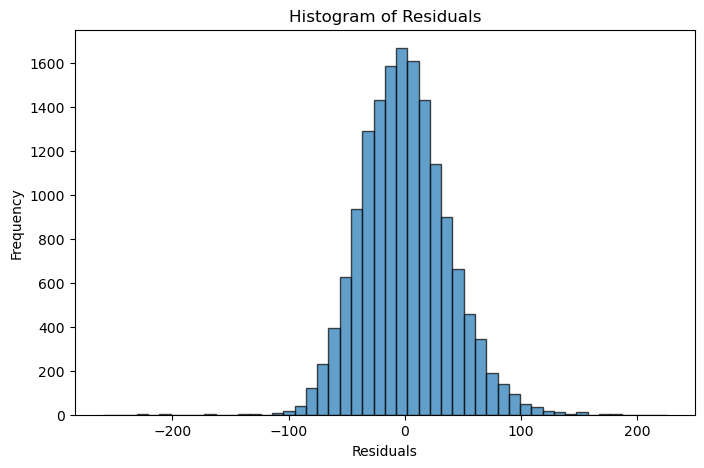

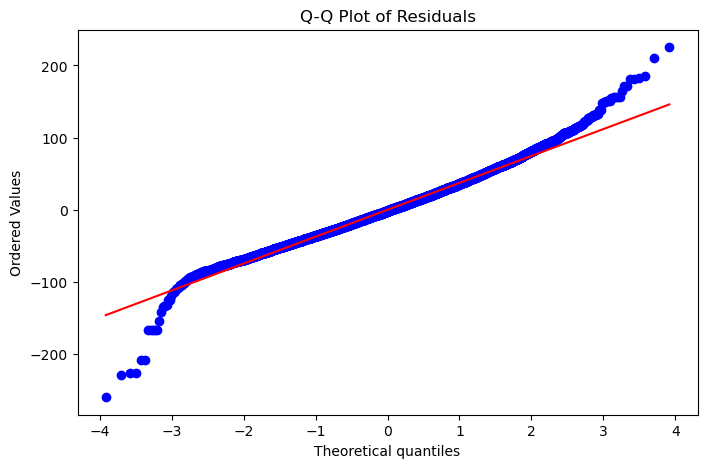

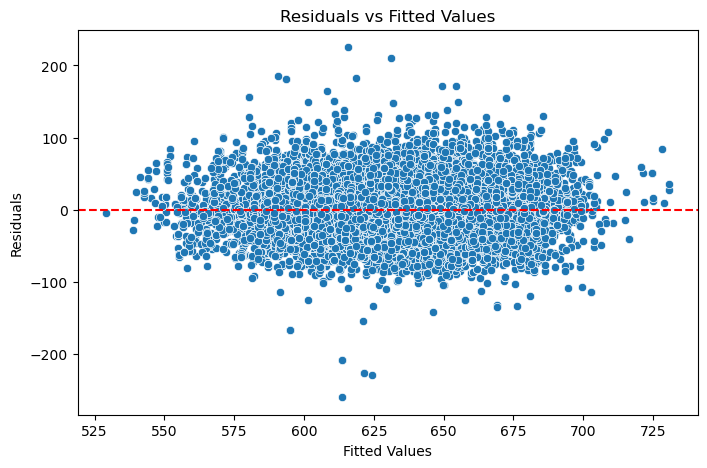

Highly Correlated Feature Pairs (Abs Correlation > 0.95):
('E_0', 'E_1')
('B_0', 'B_1')
('age_youngest', 'age_youngest_sq')
('car_value_i', 'car_value_i_age_youngest')
Dropped 4 features due to high multicollinearity.


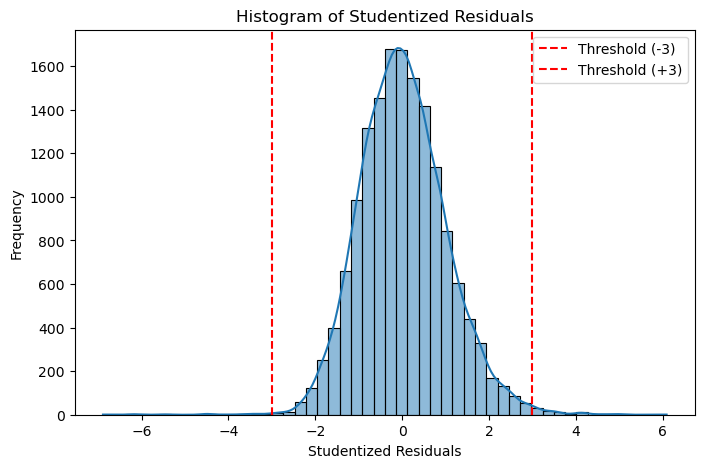

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import OLSInfluence
plt.style.use('default')

residuals = model_region_no_oldest.resid
fitted_values = model_region_no_oldest.fittedvalues

plt.ion() 
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, edgecolor="k", alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

influence = OLSInfluence(model_region_no_oldest)
leverage = influence.hat_matrix_diag  
cooks_d = influence.cooks_distance[0] 

X_numeric = pd.DataFrame(model_region_no_oldest.model.exog, columns=model_region_no_oldest.model.exog_names)
correlation_matrix = X_numeric.corr()
high_corr_pairs = np.where(np.abs(correlation_matrix) > 0.95)
correlated_features = [(correlation_matrix.index[i], correlation_matrix.columns[j]) 
                       for i, j in zip(*high_corr_pairs) if i != j]
correlated_features = list(set(tuple(sorted(pair)) for pair in correlated_features))
print("Highly Correlated Feature Pairs (Abs Correlation > 0.95):")
for feature_pair in correlated_features:
    print(feature_pair)    
features_to_drop = [pair[1] for pair in correlated_features]

X_numeric_reduced = X_numeric.drop(columns=features_to_drop, errors="ignore")
print(f"Dropped {len(features_to_drop)} features due to high multicollinearity.")
model_robust = sm.RLM(model_region_no_oldest.model.endog, model_region_no_oldest.model.exog).fit()
hat_matrix_robust = model_robust.model.exog @ np.linalg.pinv(model_robust.model.exog.T @ model_robust.model.exog) @ model_robust.model.exog.T
leverage_robust = np.diag(hat_matrix_robust)
residuals_robust = model_robust.resid
std_residuals = np.std(residuals_robust)
studentized_residuals_robust = residuals_robust / std_residuals
studentized_residuals_robust_series = pd.Series(studentized_residuals_robust)
  
plt.figure(figsize=(8, 5))
sns.histplot(studentized_residuals_robust, bins=50, kde=True)
plt.axvline(x=-3, color="red", linestyle="--", label="Threshold (-3)")
plt.axvline(x=3, color="red", linestyle="--", label="Threshold (+3)")
plt.xlabel("Studentized Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Studentized Residuals")
plt.legend()
plt.show()

For the histogram, the residuals do not follow a perfect normal distribution, suggesting potential non-linearity or heteroskedasticity. For the QQ plot, there are some deviations from the 45-degree line, which indicates skewness and heavy tails. For our scatter plot, the residuals are randomly scattered across the horizontal red line, indicating that the linearity assumptions are met. A constant spread across the range of fitted values suggests that homoscedasticity is satisfied. Some residuals are very far from 0, which demonstrates the presence of outliers that must be handled. For our fourth plot, I removed four features as they caused errors in my code because these values are being divided by 0. All histogram boxes outside the red box are outliers, with the graph being roughly bell-shaped.

----------

## 8 Model Improvement (Box-Cox Transformation)

In [17]:
from scipy.stats import boxcox

# Note: cost must be strictly positive for Box-Cox to work.
transformed_cost, lambda_opt = boxcox(y_train)
print("Optimal Box-Cox lambda:", lambda_opt)

Optimal Box-Cox lambda: 0.5328144668200044


----------

In [18]:
# Apply the Box-Cox transformation to the dependent variable
cost=df['cost']
cost_transformed = boxcox(cost, lmbda=0)

# Define the predictors for the original model
significant_vars_region_no_oldest = [
    "homeowner", "car_age",'age_youngest', 
    "married_couple", "C_previous", "duration_previous", 'A_0', 'A_1', 'A_2','B_1', 'C_1', 'C_2', 'C_3',
    'C_4', 'D_1', 'D_2', 'D_3', 'E_1', 'F_1', 'F_2', 'F_3', 'G_1', 'G_2', 'G_3', 'G_4',
    "region_Midwest", "region_Northeast", "region_South", "region_West",
    'car_value_a', "car_value_b", "car_value_c", "car_value_d",
    "car_value_e", "car_value_f", "car_value_g", "car_value_h"
]

# Extract the predictors
X_train_region_no_oldest = df[significant_vars_region_no_oldest].copy()

# Add interaction terms
X_train_region_no_oldest["age_youngest_sq"] = X_train_region_no_oldest["age_youngest"] ** 2
X_train_region_no_oldest["car_age_sq"] = X_train_region_no_oldest["car_age"] ** 2
car_value_columns = [col for col in X_train_region_no_oldest.columns if "car_value" in col]
for col in car_value_columns:
    X_train_region_no_oldest[f"{col}_age_youngest"] = X_train_region_no_oldest[col] * X_train_region_no_oldest["age_youngest"]

# Add a constant for the regression
X_train_region_no_oldest_with_const = sm.add_constant(X_train_region_no_oldest)

# Fit the model with the transformed cost
model_region_no_oldest_box_cox = sm.OLS(cost_transformed, X_train_region_no_oldest_with_const).fit()

# Display the model summary
model_region_no_oldest_box_cox_summary = model_region_no_oldest_box_cox.summary()
model_region_no_oldest_box_cox_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        01:00:48   Log-Likelihood:                 21802.
No. Observations:               15483   AIC:                        -4.352e+04
Df Residuals:                   15440   BIC:                        -4.319e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.7489      0.007    388.934      0.000       2.735       2.763
homeowner                   -0.0205      0.001    -19.400      0.000      -0.023      -0.018
car_age                     -0.0021      0.000     -8.894      0.000      -0.003      -0.002
age_youngest                -0.0038      0.000     -9.766      0.000      -0.005      -0.003
married_couple              -0.0079      0.001     -6.475      0.000      -0.010      -0.005
C_previous                  -0.0113      0.001    -21.380      0.000      -0.012      -0.010
duration_previous           -0.0021      0.000    -19.596      0.000      -0.002      -0.002
A_0                          0.8711      0.003    327.294      0.000       0.866       0.876
A_1                          0.9348      0.003    365.197      0.000       0.930       0.940
A_2                          0.9430      0.003    344.565      0.000       0.938       0.948
B_1                          0.0032      0.001      2.782      0.005       0.001       0.005
C_1                          0.6854      0.002    325.319      0.000       0.681       0.690
C_2                          0.6857      0.002    335.488      0.000       0.682       0.690
C_3                          0.6870      0.002    348.504      0.000       0.683       0.691
C_4                          0.6908      0.002    284.298      0.000       0.686       0.696
D_1                          0.9160      0.003    352.668      0.000       0.911       0.921
D_2                          0.9164      0.003    363.455      0.000       0.911       0.921
D_3                          0.9165      0.003    365.578      0.000       0.912       0.921
E_1                          0.0179      0.001     14.051      0.000       0.015       0.020
F_1                         -0.0056      0.002     -2.984      0.003      -0.009      -0.002
F_2                         -0.0047      0.002     -2.550      0.011      -0.008      -0.001
F_3                         -0.0106      0.003     -3.417      0.001      -0.017      -0.005
G_1                          0.6768      0.002    334.461      0.000       0.673       0.681
G_2                          0.6939      0.002    367.770      0.000       0.690       0.698
G_3                          0.6885      0.002    344.400      0.000       0.685       0.692
G_4                          0.6896      0.002    328.321      0.000       0.685       0.694
region_Midwest               0.6584      0.002    319.408      0.000       0.654       0.662
region_Northeast             0.7112      0.002    349.223      0.000       0.707       0.715
region_South                 0.6973      0.002    356.758      0.000       0.693       0.701
region_West                  0.6820      0.002    333.364      0.000       0.678       0.686
car_value_a   

----------

### Recap:

In this, we have practiced creating linear models using `statsmodels` and iteratively trimming the input variables to go from including all the variables in the dataset to using only the most relevant variables. We excluded those variables that were statistically insignificant and removed those that had high correlation. Finally, we performed some feature engineering in an attempt to remove some tail behavior that deviates from the normal distribution to better fit our linear model. In the end, we had a very minimal model that contained variables that other insurance companies use to charge premiums that gave us insight on how we can better serve a niche population. 

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14604\1482915409.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_features = shap_vals_sorted.tail(top_n // 2).append(shap_vals_sorted.head(top_n // 2))


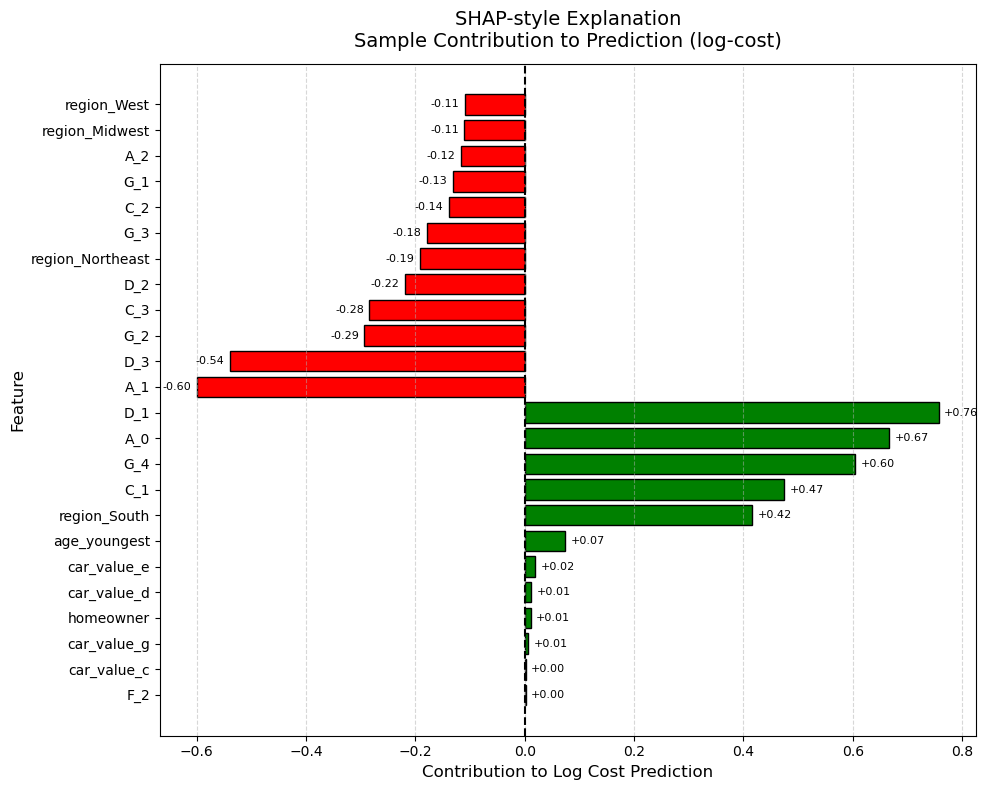

Base value (mean log-cost): 6.45
Predicted log-cost:         6.41
Sum of SHAP values:         -0.04
Difference (should match):  -0.04


In [21]:
def plot_shap_like_bar(shap_vals, base_value, pred_value, title="SHAP-style Explanation", top_n=25):
    # Prepare values
    shap_vals_sorted = shap_vals.sort_values()
    top_features = shap_vals_sorted.tail(top_n // 2).append(shap_vals_sorted.head(top_n // 2))
    colors = top_features.apply(lambda x: 'green' if x > 0 else 'red')

    plt.figure(figsize=(10, 8))
    bars = plt.barh(top_features.index, top_features.values, color=colors, edgecolor='black')

    # Annotate each bar with value
    for bar in bars:
        w = bar.get_width()
        plt.text(w + 0.01 if w > 0 else w - 0.01, bar.get_y() + bar.get_height()/2,
                 f"{w:+.2f}", va='center', ha='left' if w > 0 else 'right', fontsize=8)

    plt.axvline(0, color='black', linestyle='--')
    plt.title(f"{title}\nSample Contribution to Prediction (log-cost)", fontsize=14, pad=12)
    plt.xlabel("Contribution to Log Cost Prediction", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    print(f"Base value (mean log-cost): {base_value:.2f}")
    print(f"Predicted log-cost:         {pred_value:.2f}")
    print(f"Sum of SHAP values:         {shap_vals.sum():.2f}")
    print(f"Difference (should match):  {pred_value - base_value:.2f}")

# Example usage (assuming shap_vals, base_value, and pred_value are already computed):
plot_shap_like_bar(shap_vals, base_value, pred_value)


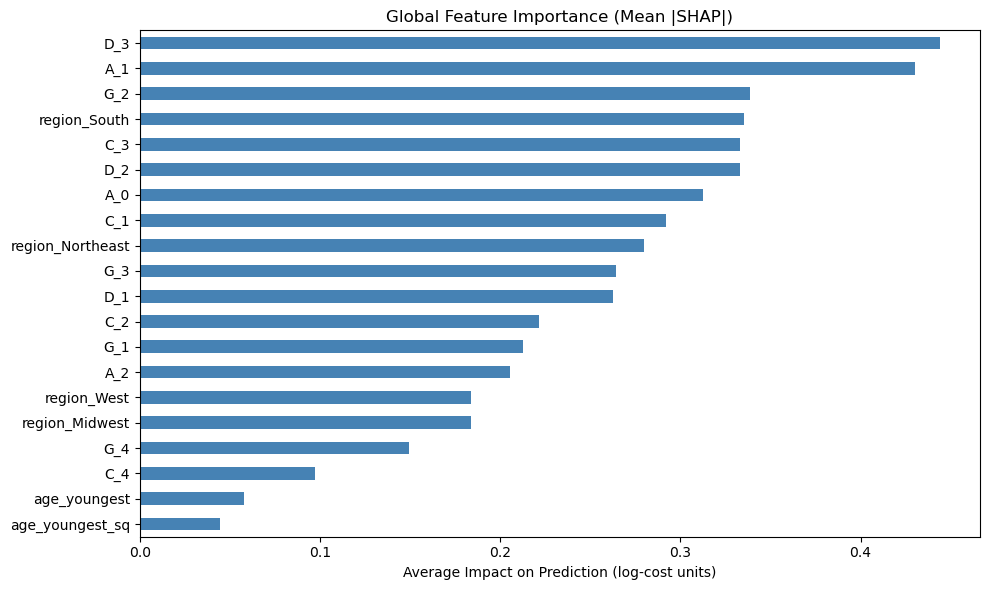

In [20]:
shap_matrix = (X_train_region_no_oldest_with_const - mean_vals) * coefs
mean_abs_shap = shap_matrix.abs().mean().sort_values(ascending=False).drop("const")

plt.figure(figsize=(10, 6))
mean_abs_shap[:20].plot(kind='barh', color='steelblue')
plt.title("Global Feature Importance (Mean |SHAP|)")
plt.xlabel("Average Impact on Prediction (log-cost units)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Conclusion:

Final Conclusion: Allstate Insurance Cost Modeling

In this project, we built and iteratively refined a linear regression model to predict auto insurance costs using customer and policy attributes from a cleaned Allstate survey dataset.

Modeling Summary:

We started with a full model using one-hot encoded features for car value, state, and coverage options (A–G), with cost as the target. Through stepwise statistical significance filtering, VIF analysis, and multicollinearity removal, we isolated a robust set of predictors. We introduced interaction terms and nonlinear features (e.g., age_youngest², car_age², and car_value × age_youngest) to capture second-order effects. A Box-Cox transformation was applied to the target (cost) to stabilize variance and improve linearity.

The final model (model_region_no_oldest_box_cox) uses:

Encoded coverage levels, Car value category, Age and homeowner status, Region (instead of state) for parsimony, Key interactions and nonlinear terms.

Interpretability with SHAP-style Analysis:

To interpret individual predictions:

We used SHAP-style bar plots, where feature contributions to a sample prediction were visualized based on their deviation from the mean and their learned coefficients. This showed how, for example, selecting G_4 or having a young driver can increase predicted cost, while owning a home or being in a cheaper region decreases it.

To interpret model behavior globally:

We plotted average absolute SHAP values across features, revealing that:

Coverage choices (especially A, G, F) are the dominant cost drivers. Customer features like age_youngest, homeowner, and duration_previous still matter meaningfully. Regional differences show that being in the Northeast tends to reduce cost relative to the South or West.

Business Insights:

Younger and riskier drivers increase premium costs — but only in combination with expensive vehicles or aggressive coverage levels. Homeownership and long insurance history are predictors of lower premiums, validating traditional underwriting assumptions. The effect of car value is not purely linear — expensive vehicles combined with young drivers show compounding effects on premiums. Regional pricing varies in line with expected loss trends and legal climate, validating region-based risk segmentation.

Next Steps:

To further improve the model:

Use quantile regression or gradient boosting for more flexible nonlinearity

Add external geospatial risk data (e.g., accident rates per ZIP)

Calibrate predictions with conformal intervals for real-world pricing uncertainty

Deploy into a pricing engine that accepts user inputs and generates live SHAP explanations

This final model is interpretable, statistically robust, and business-aligned, providing both predictive power and actionable insights for insurance product design and customer segmentation.